In [10]:
import MURA
import shutil
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob


image segmentation

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RxMj5CyvMLmb4hSLTxva")
project = rf.workspace("cs173").project("mura-classification")
dataset = project.version(2).download("png-mask-semantic")


Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MURA-Classification-2 in png-mask-semantic:: 100%|██████████| 8/8 [00:00<00:00, 3899.86it/s]


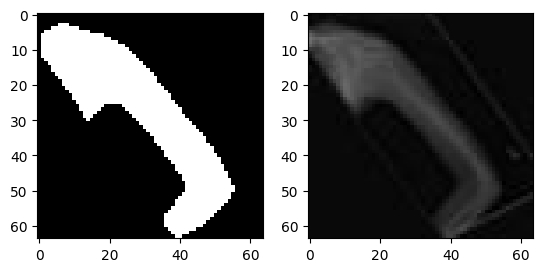

In [4]:
# Load the image
fig, axes = plt.subplots(1, 2)
mask_image = cv2.imread('/home/cara/Thesis/Aron Branch/MURA-Classification-2/train/MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image1_png.rf.75f6bb6ba915a067d3f4b86ef3f9d320_mask.png', cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread('/home/cara/Thesis/Aron Branch/MURA-Classification-2/train/MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image1_png.rf.75f6bb6ba915a067d3f4b86ef3f9d320.jpg')
axes[0].imshow(mask_image, cmap='gray')
axes[1].imshow(original_image)

plt.show()

In [5]:
from PIL import Image
mask = np.array(mask_image) > 0
original_array = np.array(original_image)
modified_array = np.copy(original_array)
modified_array[np.logical_not(mask)] = [0, 0, 0]  # Set non-masked pixels to black
output_image = Image.fromarray(modified_array)


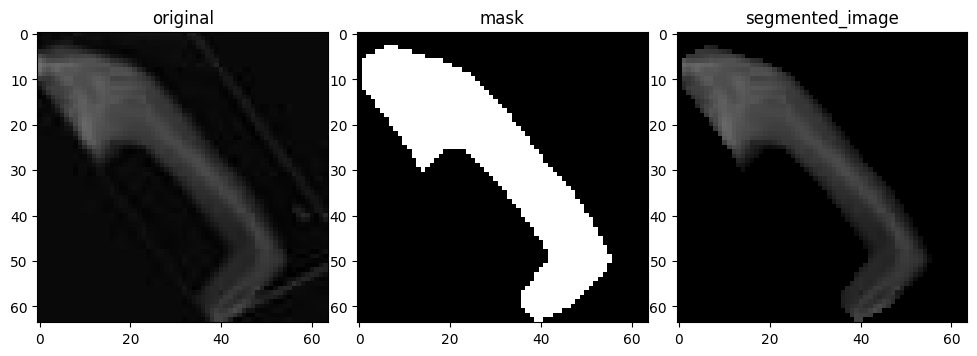

In [9]:
fig, axes = plt.subplots(1, 3 ,figsize=(12, 4))
axes[0].imshow(original_image)
axes[0].set_title('original')

axes[1].imshow(mask_image, cmap='gray')
axes[1].set_title('mask')

axes[2].imshow(output_image)
axes[2].set_title('segmented_image')

plt.subplots_adjust(wspace=0.1)

plt.show()

In [28]:
output_image.save('/home/cara/Thesis/Aron Branch/Images/Segmented_images/output.png', 'PNG')


## looping thru roboflow images

In [55]:

folder_path = '/home/cara/Thesis/Aron Branch/MURA-Classification-2/train'  
image_files = os.listdir(folder_path)

toSegment_images=[],[]

for image in image_files:
    if image.endswith('.png'): #mask
        toSegment_images[0].append(image)
    elif image.endswith('.jpg'): #original
        toSegment_images[1].append(image)


In [67]:
toSegment_images[0][0]

'MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image2_png.rf.102e9b01f26fca8e3ef82b37ee9fb94b_mask.png'

[ WARN:0@3125.494] global loadsave.cpp:244 findDecoder imread_('M'): can't open/read file: check file path/integrity
[ WARN:0@3125.495] global loadsave.cpp:244 findDecoder imread_('M'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

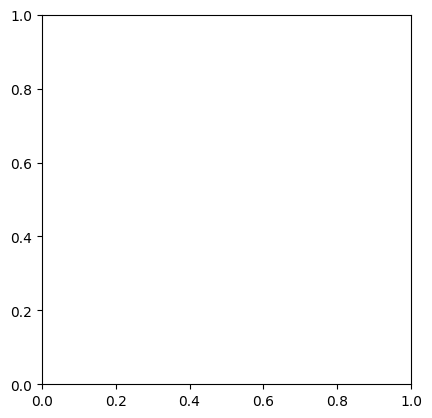

In [68]:
suffixes_to_remove = ['.png', '_mask', '.rf']
folder_path = '/home/cara/Thesis/Aron Branch/segmented_images'

for i, images in enumerate(toSegment_images):
    mask_image = cv2.imread(images[0][i], cv2.IMREAD_GRAYSCALE)
    orig_image = cv2.imread(images[1][i])
    plt.imshow(mask_image, cmap='gray')
    # mask = np.array(mask_image) > 0
    # original_array = np.array(orig_image)
    # modified_array = np.copy(original_array)
    # modified_array[np.logical_not(mask)] = [0, 0, 0]  # Set non-masked pixels to black
    # output_image = Image.fromarray(modified_array)


    # #save each image and fixing long file name from roboflow
    # for suffix in suffixes_to_remove:
    #     orig_image = orig_image.replace(suffix, '')

    # file_name = os.path.splitext(orig_image)[0]
    # output_image.save(folder_path + file_name, 'PNG')


    

In [71]:
mask_image = cv2.imread(toSegment_images[0][i], cv2.IMREAD_GRAYSCALE)
# plt.imshow(mask_image, cmap='gray')

[ WARN:0@3247.994] global loadsave.cpp:244 findDecoder imread_('MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image2_png.rf.102e9b01f26fca8e3ef82b37ee9fb94b_mask.png'): can't open/read file: check file path/integrity


In [58]:
import os

file_name = 'MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image2_png.rf.102e9b01f26fca8e3ef82b37ee9fb94b_mask.png'

# Remove the suffixes
suffixes_to_remove = ['.png', '_mask', '.rf']
name_without_suffixes = file_name
for suffix in suffixes_to_remove:
    name_without_suffixes = name_without_suffixes.replace(suffix, '')

# Get the name without the file extension
name_without_extension = os.path.splitext(name_without_suffixes)[0]

print(name_without_extension)


MURA-v1-1-train-XR_HUMERUS-patient00058-study1_negative-image2_png
